## Imports

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Reshape
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.applications.vgg16 import VGG16


## Loading the data

In [53]:
def load_data():
    # Load dataset file
    data_frame = pd.read_csv('dataset/train.csv')
    
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    imgs_array = np.vstack(data_frame['Image'].values)/ 255.0
    imgs_array = imgs_array.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs_array = imgs_array.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels_array = labels_array.astype(np.float32) 
    
    return imgs_array, labels_array

## Visualization

In [54]:
train_x, train_y = load_data()

In [55]:
print(train_x.shape)
print(train_y.shape)

(2140, 96, 96, 1)
(2140, 30)


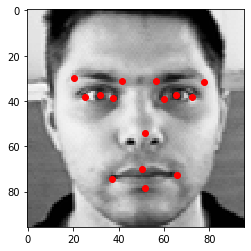

In [56]:
n=3
train_y[n] = (train_y[n]*48)+48
image = np.squeeze(train_x[n])
plt.imshow(image, cmap='gray')
plt.plot(train_y[n][::2], train_y[n][1::2], 'ro')
plt.show()

In [16]:
train_y[0]

array([7477950. , 4393028. , 3324389.2, 4459292. , 6726790.5, 4481404.5,
       8450086. , 4415104. , 4208112.5, 4481404.5, 2285990. , 4525592. ,
       6174422.5, 3487193. , 9068680. , 3266253. , 4451128. , 3376741. ,
       1623170. , 3663944.5, 5224399.5, 7088422.5, 7574819. , 8137585.5,
       3343426. , 8151423. , 5393573. , 8379245. , 5533715. , 9695476. ],
      dtype=float32)

## SImple Model

In [51]:
def simple_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(96, 96, 1))) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model

In [58]:
X_train, y_train = load_data()
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))


epochs = 60
batch_size = 64

model = simple_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)

# Complie Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)


In [59]:
model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)
model.save('simple_model.h5')

Epoch 1/60
27/27 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.5590
Epoch 00001: val_loss improved from inf to 0.01015, saving model to checkpoint1.hdf5
27/27 [==============================] - 9s 327ms/step - loss: 0.0270 - accuracy: 0.5590 - val_loss: 0.0101 - val_accuracy: 0.4322
Epoch 2/60
27/27 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.6478
Epoch 00002: val_loss improved from 0.01015 to 0.00862, saving model to checkpoint1.hdf5
27/27 [==============================] - 9s 319ms/step - loss: 0.0083 - accuracy: 0.6478 - val_loss: 0.0086 - val_accuracy: 0.4322
Epoch 3/60
27/27 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.6875
Epoch 00003: val_loss improved from 0.00862 to 0.00817, saving model to checkpoint1.hdf5
27/27 [==============================] - 9s 334ms/step - loss: 0.0063 - accuracy: 0.6875 - val_loss: 0.0082 - val_accuracy: 0.4322
Epoch 4/60
27/27 [==============================] - ETA: 0s - 